# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
sns.set_style('whitegrid')
sns.set_palette('viridis')
%matplotlib inline



## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [2]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [5]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [15]:
# Aggregate data by year (e.g., sum, average, etc.)
# Here, we're using mean, but you can change it to sum, median etc.
df_aggregated = df.groupby('Year').agg({
    'Global Average Temperature (°C)': 'mean',
    'CO2 Concentration (ppm)': 'mean',
    'Sea Level Rise (mm)': 'mean',
    'Arctic Ice Area (million km²)': 'mean'
}).reset_index()

# Filter the data to span exactly 124 years (assuming you want 1900-2023)
df_aggregated = df_aggregated[(df_aggregated['Year'] >= 1900) & (df_aggregated['Year'] <= 2023)]

#Check that the data contains 124 years
print(df_aggregated)


     Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
0    1900                        14.506663               350.373405   
1    1901                        14.485343               349.757140   
2    1902                        14.476262               349.299686   
3    1903                        14.492360               349.644375   
4    1904                        14.494241               349.537032   
..    ...                              ...                      ...   
119  2019                        14.500105               348.642249   
120  2020                        14.496937               350.021731   
121  2021                        14.501424               350.150302   
122  2022                        14.495233               350.493023   
123  2023                        14.474559               351.003294   

     Sea Level Rise (mm)  Arctic Ice Area (million km²)  
0             150.408288                       8.978659  
1             150.548828       

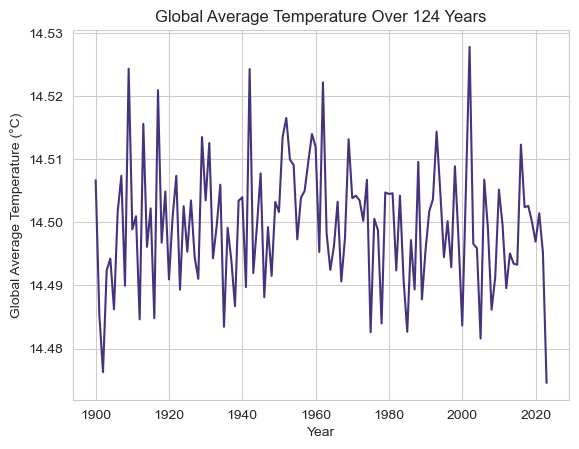

In [11]:
# Visualize one of the time series, like Global Average Temperature

plt.plot(df_aggregated['Year'], df_aggregated['Global Average Temperature (°C)'])
plt.xlabel('Year')
plt.ylabel('Global Average Temperature (°C)')
plt.title('Global Average Temperature Over 124 Years')
#plt.grid(True)
plt.show()

In [1]:
# # create a plot for multiple lines
# plt.figure(figsize=(10, 6))

# # Plot each of the columns on the same axis
# plt.plot(df_aggregated['Year'], df_aggregated['Global Average Temperature (°C)'], label='Global Average Temperature (°C)', color='tab:red')
# plt.plot(df_aggregated['Year'], df_aggregated['CO2 Concentration (ppm)'], label='CO2 Concentration (ppm)', color='tab:blue')
# plt.plot(df_aggregated['Year'], df_aggregated['Sea Level Rise (mm)'], label='Sea Level Rise (mm)', color='tab:green')
# plt.plot(df_aggregated['Year'], df_aggregated['Arctic Ice Area (million km²)'], label='Arctic Ice Area (million km²)', color='tab:orange')


# # Add labels and title
# plt.xlabel('Year')
# plt.ylabel('Mean Values')
# plt.title('Environmental Time Series (1900 - 2023)')

# # Add a legend to differentiate between the lines
# plt.legend()

# # Show the plot
# plt.tight_layout()
# plt.show()